# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('interviewData.csv',header=None)
df.columns = ['Exam Mark','test score','Selection']
df.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
> * Selection
* Do you need to encode the target variable (Yes/No)?
> * Yes
* If yes, briefly explain why you need to encode the target variable.
> * To transform the categorical variable into a numerical format that can be used in a machine learning model.
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> * Binary encoding
* Explain why you have selected the above encoding method.
> * There are only two values of target variable.

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [3]:
# Create a new dataset by apply the encoding  method selected above on the dataset

# Read this to implement this part
#  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

from sklearn import preprocessing

# Select the appropriate encode
# preprocessing()
# Transform the target variable
labels=["Yes","No"]
df["Selection"]=preprocessing.LabelBinarizer().fit(labels).transform(df["Selection"])
# preprocessing.LabelBinarizer()

display(df)

,Exam Mark,test score,Selection
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


<Axes: xlabel='Exam Mark', ylabel='test score'>

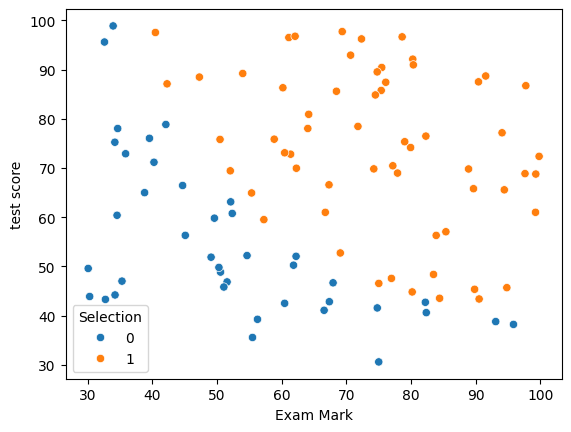

In [4]:
# Wrie a code to visualize your data
# See https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns

sns.scatterplot(df,x = "Exam Mark",y="test score",hue ="Selection")

## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [5]:
# Write a function 'predict' to compute the logistic Regression model
import math
def Sigmoid(z):
  return 1/(1+math.exp(-z))  
def predict(w,b,x):
  N,M = x.shape
  y_pred = np.zeros((N,))
  for i in range(N):
    y_pred[i] = Sigmoid(np.dot(x[i],w)+b)
  return y_pred

### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * MSE is not a convex function in case of logistic regression, and so cannot be used for gradient descent algorithm.

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> * A loss function quantifies the difference between the actual and predicted outcomes for each instance.
* What is a cost function?
> * The cost function is used to optimize the ML model.
* What is the distinction between them?
> * Cost function is the average of loss of the entire training dataset.

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

In [7]:
# write a function to estimate the derivatives of the cost function

def compute_gradient_wb(w,b,x,y):
  
  N,M = x.shape
  dMSE_dw = np.zeros((M,))
  dMSE_db = 0
  ypred = predict(w,b,x)
  for i in range(N):    
    res = ypred[i]-y[i]
    for j in range(M):
      dMSE_dw[j] += res*x[i][j]
    dMSE_db += res
  dMSE_dw = 2*dMSE_dw/N
  dMSE_db = 2*dMSE_db/M
  return dMSE_dw,dMSE_db


In [14]:
def compute_cost(w,b,X,y):
    y_pred = predict(w,b,X)
    cost = np.mean(-y*np.log(y_pred+.00001)-(1-y)*np.log(1-y_pred+.00001))
    return cost

### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [17]:
# Write a function to perform the gradient decent

def gradient_descent(w,b,X_train,X_test,y_train,y_test,alpha,num_iter):
  train_cost = []
  test_cost = []
  for i in range(num_iter):
  #  print(X_train.shape)
    dMSE_dw,dMSE_db = compute_gradient_wb(w,b,X_train,y_train)
    w = w - alpha*dMSE_dw
    b = b - alpha*dMSE_db 
    train_cost.append(compute_cost(w,b,X_train,y_train))
    test_cost.append(compute_cost(w,b,X_test,y_test))
  return(w,b, train_cost,test_cost)

## Model Training

In [18]:
# Write the code to train the model

# Split the data into train and test datasets using
# see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# get the data from dataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# split the dataset such that 20% test and 80% train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)


# initilize the weights
np.random.seed(1)
w_ini = np.random.rand(2)
b_ini = -9

# Fix the learning rate
alpha = 0.001

# fix the number of iteration
num_iter = 1000


# w,b,J_train,J_test = gradient_descent(w_ini,b_ini,X_train, X_test, y_train, y_test,alpha,num_iter)
w,b,J_train,J_test = gradient_descent(w_ini,b_ini,X_train, X_test, y_train, y_test,alpha,num_iter)

print(f"Final parameters: w:{w}, b:{b}")

Final parameters: w:[0.08798227 0.08748009], b:-10.539099695183165


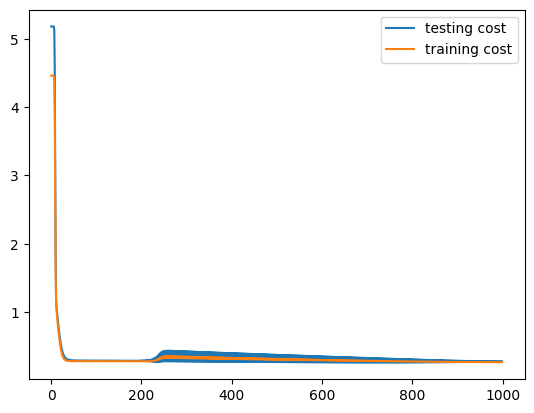

In [23]:
# Plot the train and test loss in one plot
iter = np.arange(num_iter)
plt.plot(iter,J_test,label="testing cost")
plt.plot(iter,J_train,label="training cost")
plt.legend()
plt.show()
   

<Axes: xlabel='Exam Mark', ylabel='test score'>

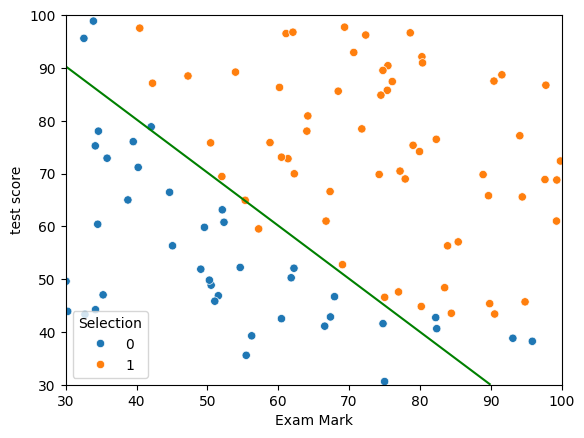

In [29]:
#  plot the Logistic Regression Model for the estimated w and b values

P = 0.5 # the boundary seperation value (probability)

# Generate sample points in the domain 30 to 100
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)

# making it into 2D mesh
X, Y = np.meshgrid(u, v)
logReg = np.zeros((len(u), len(v)))

# Predict the result of the (u,v) pair data with the estimated w and b values
for i in range(len(u)):
    for j in range(len(v)):
      zz = X[i,j]*w[0]+Y[i,j]*w[1]+b
      logReg[i,j] = 1/(1+np.exp(-zz))


plt.contour(u,v,logReg, levels = [P], colors="g" )

# to see the full function plot in the domain
# plt.contourf(u,v,logReg)

# Plot the real data
sns.scatterplot(df,x = 'Exam Mark',y='test score',hue ='Selection')


### Answer the following


* What does the P value signify in the provided code?
> * P indicates the threshold value above which values are classified as 1, and below which values are classified as 0. It represents the decision boundary.
* How will altering the P value affect the outcome?
> * Changing P value will move the decision boundary.
* What range of values can P encompass?
> * 0 to 1
* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
> * Using an incorrect P value could lead to wrong diagnosis.

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [42]:
# Your code
x = np.array([[65,65]])
y_pred = predict(w,b,x)
if y_pred == 0:
    print("Student will not pass the interview.")
else:
    print("Student will pass the interview.")

Student will pass the interview.
